In [1]:
# Importing required packages:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading csv file 
test=pd.read_csv("/home/siddharth/Desktop/benz/test.csv")
train=pd.read_csv("/home/siddharth/Desktop/benz/train.csv")
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#spliiting numeric and object data
train_nu=train.select_dtypes(include=[float, int])
train_txt=train.select_dtypes(include=[object])

In [4]:
train_nu

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# finding Columns with 0 variance:
df= {"feature":train_nu.columns,"Var":train_nu.var()}

In [6]:
df=pd.DataFrame(df)

In [7]:
df=df.sort_values(by="Var")

In [8]:
df.groupby("Var").count()

,feature
Var,
0.000000e+00,12
2.375861e-04,1
2.375861e-04,1
2.375861e-04,1
2.375861e-04,1
...,...
2.496467e-01,1
2.497867e-01,1
2.500357e-01,1


In [9]:
x=df[0:12]
x

,feature,Var
X289,X289,0.0
X330,X330,0.0
X268,X268,0.0
X347,X347,0.0
X107,X107,0.0
X235,X235,0.0
X233,X233,0.0
X290,X290,0.0
X11,X11,0.0
X297,X297,0.0


In [10]:
#List of cols with 0 variance train.:
to_drop=list(x["feature"])

In [11]:
#Dropping cols with zero variance:
train_2=train.drop(to_drop, axis=1)

In [12]:
#Check for null values for test.
train.isnull().sum().sum()

0

In [13]:
#Unique Values in train dataset:
y=list(train.columns)
for i in y:
    print(i,":", pd.unique(train[i]))

ID : [   0    6    7 ... 8412 8415 8417]
y : [130.81  88.53  76.26 ...  85.71 108.77  87.48]
X0 : ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 : ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 : ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 : ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 : ['d' 'b' 'c' 'a']
X5 : ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 : ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 : ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
X10 : [0 1]

In [14]:
# detecting outliers:


<AxesSubplot:xlabel='X0', ylabel='y'>

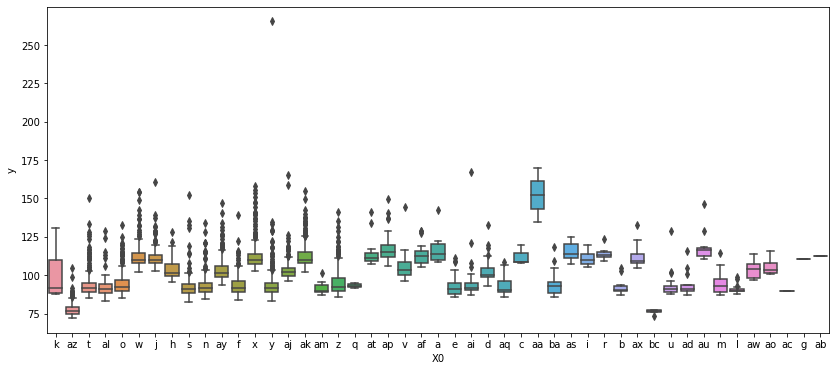

In [15]:
#X0
plt.figure (figsize= (14, 6))
sns.boxplot(x= train_2["X0"], y= train_2.y)

<AxesSubplot:xlabel='X0', ylabel='y'>

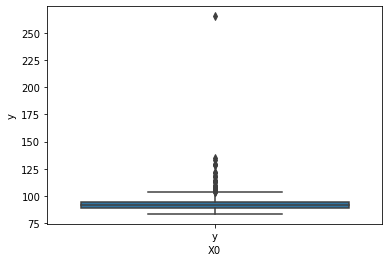

In [16]:
sns.boxplot(x=train_2.X0[train_2.X0=='y'],y=train_2.y)

In [17]:
#as seen above there is an extreme outlier 
#dropping outlier values 
train_2.drop(labels=((train_2[train_2.X0=='y']['y']).sort_values(ascending=False))[:1].index.values,inplace=True)


<AxesSubplot:xlabel='X0', ylabel='y'>

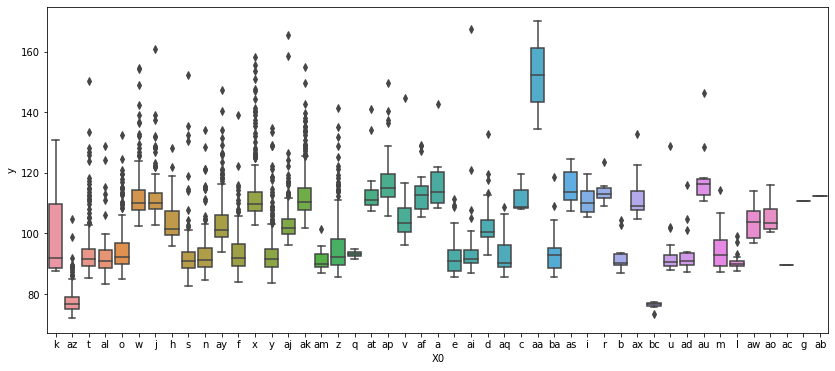

In [18]:
#confirming outlier is removed: 
plt.figure(figsize=(14,6))
sns.boxplot(x=train_2.X0,y=train_2.y)

In [19]:
#X1
def outliers (x,y):
    plt.figure(figsize=(14,6))
    sns.boxplot(x= x,y= y)

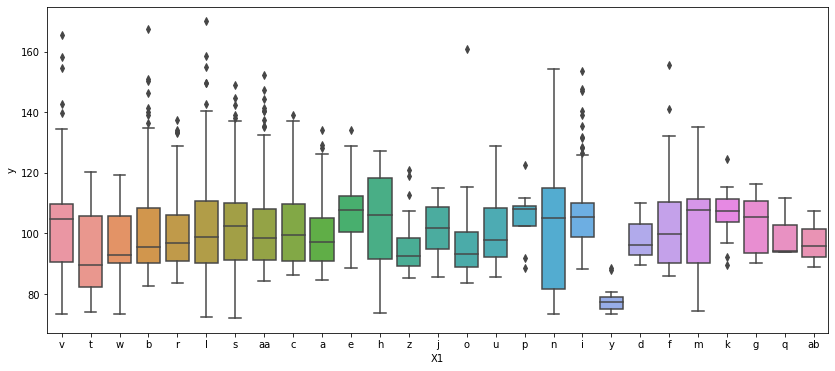

In [20]:
outliers (train_2["X1"], train_2 ["y"])

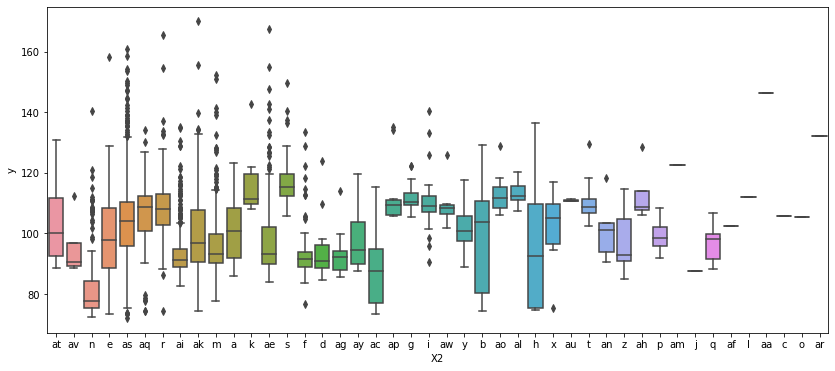

In [21]:
#X2
outliers (train_2["X2"], train_2 ["y"])

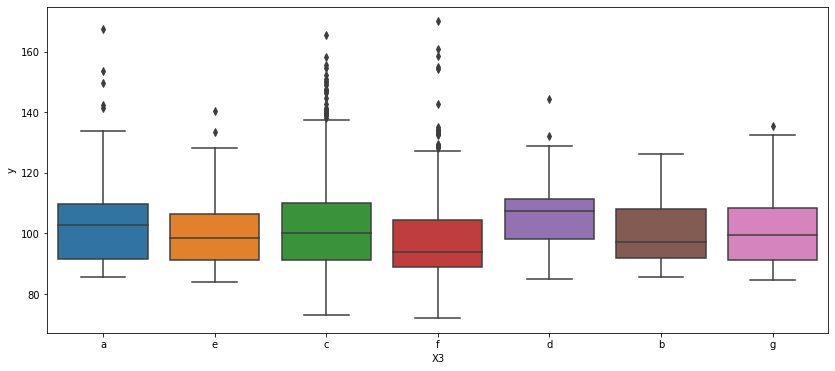

In [22]:
#X3
outliers (train_2["X3"], train_2 ["y"])

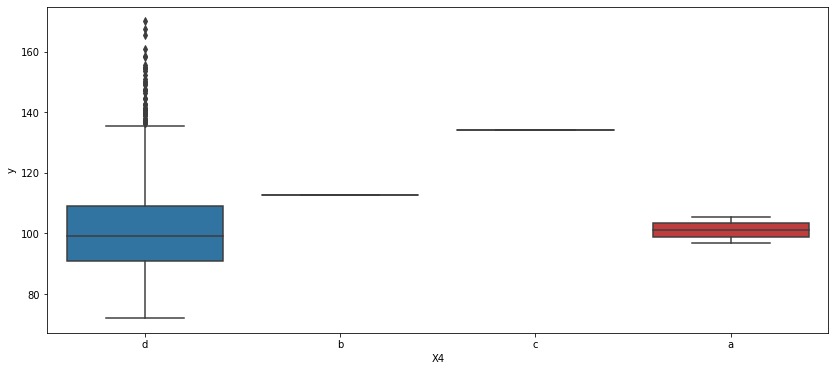

In [23]:
#X4
outliers (train_2["X4"], train_2 ["y"])
# the value 'd' repeats a large number of times compared to the rest of the values

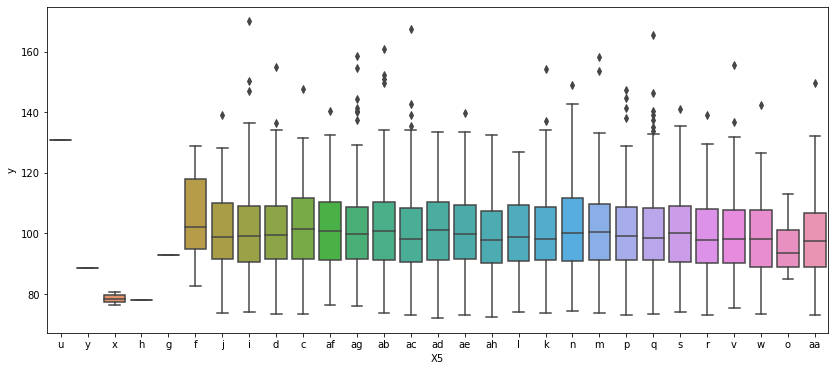

In [24]:
#X5
outliers (train_2["X5"], train_2 ["y"])

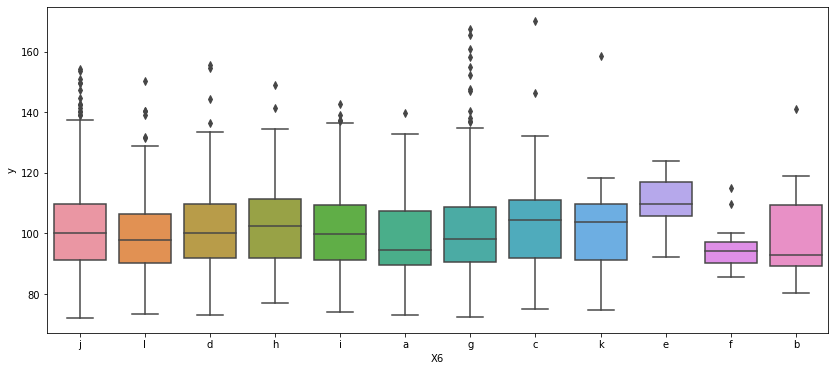

In [25]:
#X6
outliers (train_2["X6"], train_2 ["y"])

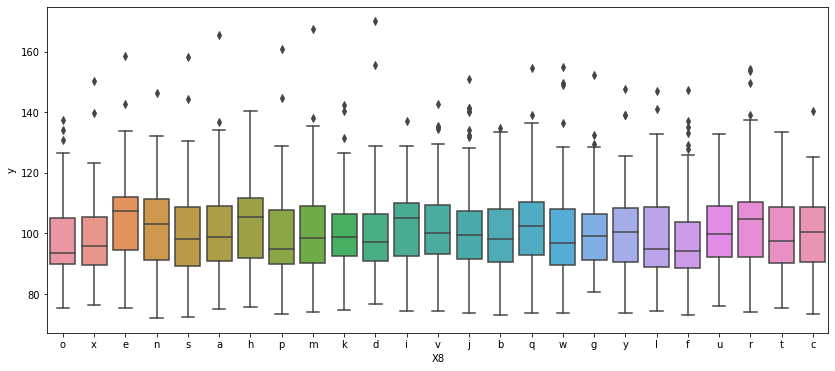

In [26]:
#X8
outliers (train_2["X8"], train_2 ["y"])

In [27]:
#No extreme outliers found in any other columns 

In [28]:
#APPLYING LABEL ENCODER 



In [29]:
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

In [30]:
train_x= train_2.drop(['y',"ID"], axis=1)
train_y= train_2["y"]
train_x2= train_2.drop(['ID','y'], axis=1)

In [31]:
encodecols= train_x.select_dtypes(include= object).columns 

In [32]:
encodecols

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [33]:
def encoder (df, x):
    for e in encodecols:
        le.fit(x[e])
        x[e]=le.transform(x[e])

In [34]:
encoder (train_2, train_x)

In [35]:
train_x.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.decomposition import PCA


In [40]:
pca= PCA(n_components=110)

In [41]:
x_pca= pca.fit_transform(train_x)

In [42]:
x_pca.shape

(4208, 110)

In [43]:
x_pca=pd.DataFrame(x_pca)

In [44]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.613251,-0.132037,15.623207,3.693885,1.366529,-2.694889,3.815775,1.536534,-0.647668,1.735919,...,-0.125123,-0.336348,-0.061947,-0.008202,0.030390,-0.187462,0.288652,0.484108,0.800076,0.124359
1,0.562354,1.559955,17.909606,-0.087378,1.537813,-4.443876,-0.799221,0.817131,-0.787510,-0.140428,...,-0.221309,0.090530,0.045672,0.160091,0.140221,-0.066138,-0.262232,0.098914,0.234398,0.143249
2,16.197269,12.297726,17.632320,0.167589,11.849153,-2.156213,0.827754,1.582397,-0.605669,-0.477449,...,0.193618,-0.248206,-0.024206,0.543310,-0.029899,-0.372104,-0.088480,0.275781,0.050229,0.475154
3,16.141713,13.536563,14.899559,-3.135726,-6.839298,-4.285531,-2.225812,2.103164,0.045256,-0.967882,...,0.041582,-0.240227,0.076517,0.113102,0.325118,-0.318916,0.028101,0.159872,0.137006,-0.008164
4,16.455198,13.181125,4.399707,7.662193,2.148687,3.764123,-1.951425,2.105056,1.182254,-1.009152,...,0.008274,-0.041299,-0.094985,0.236762,0.108318,-0.066179,-0.199913,0.157548,-0.084996,-0.023285


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,train_y,random_state=100,train_size=0.75)

In [47]:
import xgboost as xgb
xg_reg= xg_reg = xgb.XGBRegressor(objective ='reg:linear', booster="gblinear")


In [48]:
xg_reg.fit(x_train, y_train)

[17:09:20] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=-1,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=4, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

In [49]:
xg_reg.score(x_train,y_train)

0.6060952789243701

In [50]:
xg_reg.score(x_test,y_test)

0.5322783502566996

In [51]:
#Processing test data 


In [52]:
#removing rows with 0 varience 
test_var=pd.DataFrame(test.var(),columns=['Variance'])
test_drop=list(test_var[test_var["Variance"]==0].index)
test_drop

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


['X257', 'X258', 'X295', 'X296', 'X369']

In [53]:
test_2=test.drop(test_drop, axis=1)


In [54]:
test_2

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
#dropping ID and checking categorical cols 
test_x= test_2.drop(["ID"], axis=1)
encodecols2= test_x.select_dtypes(include=object)
encodecols2

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [56]:
encoder(test_2,test_x)

In [57]:
test_x

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,3,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [58]:
train_pca=pd.DataFrame (pca.fit_transform(test_x))

In [59]:
merc_predict=pd.DataFrame(xg_reg.predict(train_pca), columns=['y'])

In [60]:
#Predicting "y" for test data:
merc_predict.head()

,y
0,76.959740
1,98.779633
2,92.214249
3,75.233856
4,99.652222


In [61]:
merc_predict["ID"]= test["ID"]

In [65]:
merc_predict.head(10)

,y,ID
0,76.959740,1
1,98.779633,2
2,92.214249,3
3,75.233856,4
4,99.652222,5
5,81.769836,8
6,97.471878,10
7,96.504517,11
8,112.043739,12
9,116.904625,14


In [63]:
#Writing to csv file.
merc_predict.to_csv("merc_testdata_prediction.csv")